In [51]:
//Converting json into CSV
import pandas as pd
df = pd.read_json ("movies_db_ML.json")
df.to_csv ("movies_db_ML.csv", index = None)



Number of data used for training
(856, 5)
The Coefficient is: 
[[ 4.21752005e-05 -7.68331093e-06  6.19152179e-07  8.46738018e-04
  -8.53856218e-09]]
The Slope is: 
7.890851845885685e-08
Accuracy:  0.8566433566433567


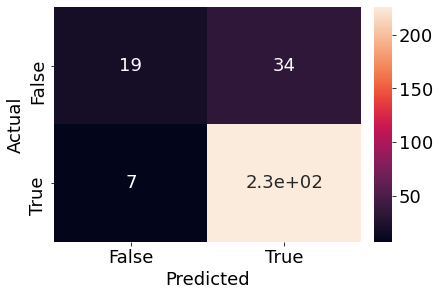

(286, 5)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
df = pd.read_csv('movies_db_ML.csv')

features_taken=['results/features/0/genre_ids', 
            'results/features/0/production_companies/0', 
            'results/features/0/vote_average', 
            'results/features/0/vote_count',
           'results/features/0/budget']

x_dummy = pd.get_dummies(df.loc[:,features_taken])

x = df[features_taken].values
y = df['labels']


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
log_reg = LogisticRegression(penalty='none',solver='lbfgs')
log_reg.fit(x_train, y_train)
y_pred=log_reg.predict(x_test)

#Total Training data
print('Number of data used for training')

print(x_train.shape)

# Retrieve the model parameters.
b = log_reg.intercept_[0]
w2 = log_reg.coef_
# Calculate the intercept and gradient of the decision boundary.
print('The Coefficient is: ')
print(w2)

print('The Slope is: ')
print(b)
import seaborn as sn

from sklearn import metrics

#Confusion matrix plotting 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()



(856, 5)